<a href="https://colab.research.google.com/github/alasramus/alasramus-DelosReyes_Maligaya_CS160P/blob/main/CS160P_Final_Project___Delos_Reyes_Maligaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CS160P Final Project - Delos Reyes & Maligaya

#This project uses ESSAY SET 2 from the dataset.  

# TESTING MODELS:
# BOW - Linear and Lasso Regression 
# BOW + rest of the features - Linear, Ridge and Lasso Regression
# Only 10 numerical/POS/orthographic features - Linear, Ridge, Lasso and Support Vector Regression 

In [ ]:
#Importing necessary packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import re, collections
from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score, cohen_kappa_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn import ensemble


In [ ]:
#Import dataset into a dataframe:

df = pd.read_csv('training_set_rel3.csv')

ParserError: ignored

In [ ]:
df.boxplot(column = 'domain1_score', by = 'essay_set', figsize = (10,10))

NameError: ignored

In [ ]:
# Get specific columns needed:

data = df[['essay_set', 'essay', 'domain1_score']].copy()
print(data)

In [ ]:
#PRE-PROCESSING

#To tokenize sentences into words:

def sentenceToWordlist(rawSentence):
    
    cleanSentence = re.sub("[^a-zA-z0-9]", " ", rawSentence)
    tokens = nltk.word_tokenize(cleanSentence)
    
    return tokens

In [ ]:
#To tokenize essay to list of word lists:

def tokenize(essay):
    
    strippedEssay = essay.strip()
    
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    rawSentences = tokenizer.tokenize(strippedEssay)
    
    tokenizedSentences = []
    for rawSentence in rawSentences:
        if len(rawSentence) > 0:
            tokenizedSentences.append(sentenceToWordlist(rawSentence))
            
    return tokenizedSentences

In [ ]:
# To calculate average word length in an essay:

def avgWordLength(essay):
    
    cleanEssay = re.sub(r'\W', ' ', essay)
    words = nltk.word_tokenize(cleanEssay)
    
    return sum(len(word) for word in words) / len(words)

In [ ]:
# To calculate number of words in an essay:

def wordCount(essay):
    
    cleanEssay = re.sub(r'\W', ' ', essay)
    words = nltk.word_tokenize(cleanEssay)
    
    return len(words)

In [ ]:
# To calculate number of characters in an essay:

def charCount(essay):
    
    cleanEssay = re.sub(r'\W', ' ', str(essay).lower())
    
    return len(cleanEssay)

In [ ]:
# To calculate number of sentences in an essay:

def sentCount(essay):
    
    sentences = nltk.sent_tokenize(essay)
    
    return len(sentences)

In [ ]:
# To calculate number of lemmas per essay:

def countLemma(essay):
    
    tokenizedSentences = tokenize(essay)
    
    lemmas = []
    wordnetLemmatizer = WordNetLemmatizer()
    
    for sentence in tokenizedSentences:
        taggedTokens = nltk.pos_tag(sentence)
        
        for tokenTuple in taggedTokens:
            
            pos_tag = tokenTuple[1]
            
            if pos_tag.startswith('N'):
                pos = wordnet.NOUN
                lemmas.append(wordnetLemmatizer.lemmatize(tokenTuple[0], pos))
            elif pos_tag.startswith('J'):
                pos = wordnet.ADJ #adjective
                lemmas.append(wordnetLemmatizer.lemmatize(tokenTuple[0], pos))
            elif pos_tag.startswith('V'):
                pos = wordnet.VERB
                lemmas.append(wordnetLemmatizer.lemmatize(tokenTuple[0], pos))   
            elif pos_tag.startswith('R'):
                pos = wordnet.ADV #adverb
                lemmas.append(wordnetLemmatizer.lemmatize(tokenTuple[0], pos))
            else:
                pos = wordnet.NOUN
                lemmas.append(wordnetLemmatizer.lemmatize(tokenTuple[0], pos))
                
    lemmaCount = len(set(lemmas))
    
    return lemmaCount

In [ ]:
# To calculate number of nouns, adjectives, verbs and adverbs in an essay:

def countPos(essay):
    
    tokenizedSentences = tokenize(essay)
    
    nounCount = 0
    adjCount = 0
    verbCount = 0
    advCount = 0
    
    for sentence in tokenizedSentences:
        taggedTokens = nltk.pos_tag(sentence)
        
        for tokenTuple in taggedTokens:
            pos_tag = tokenTuple[1]
                 
            if pos_tag.startswith('N'):
                nounCount +=1 
            elif pos_tag.startswith('J'):
                adjCount +=1 
            elif pos_tag.startswith('V'):
                verbCount +=1
            elif pos_tag.startswith('R'):
                advCount +=1
                
    return nounCount, adjCount, verbCount, advCount

In [ ]:
# Vectorization:

def getCountVectors(essays):
    
    vectorizer = CountVectorizer(max_features = 10000, ngram_range = (1, 3), stop_words = 'english')
    
    countVectors = vectorizer.fit_transform(essays)
    
    featureNames = vectorizer.get_feature_names_out()
    
    return featureNames, countVectors

In [ ]:
# To split data into train and test: 

featureNamesCV, countVectors = getCountVectors(data[data['essay_set'] == 2]['essay'])

xCV = countVectors.toarray()
yCV = data[data['essay_set'] == 2]['domain1_score'].to_numpy() #replaced 'as.matrix()' w/ 'to_numpy()' bc of error

x_train, x_test, y_train, y_test = train_test_split(xCV, yCV, test_size = 0.3)

NameError: ignored

In [ ]:
# Random Forest Regression model (BOW):
rf_func = ensemble.RandomForestRegressor

rfRegressor = rf_func(n_estimators = 1000, random_state = 0)
rfRegressor.fit(x_train, y_train)

y_pred = rfRegressor.predict(x_test)

print("Cohen's kappa score: %.2f" % cohen_kappa_score(np.rint(y_pred), y_test))

NameError: ignored

In [ ]:
# Linear Regression model (BOW):

linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)

y_pred = linearRegressor.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

In [ ]:
# Lasso Regression model (BOW):

alphas = np.array([3, 1, 0.3, 0.1, 0.03, 0.01])

lassoRegressor = Lasso()

grid = GridSearchCV(estimator = lassoRegressor, param_grid = dict(alpha = alphas))
grid.fit(x_train, y_train)

y_pred = grid.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

Cohen's kappa score: 0.39


In [ ]:
# To extract features of the essay:

def extractFeatures(data):
    
    features = data.copy()
    
    features['charCount'] = features['essay'].apply(charCount)
    features['wordCount'] = features['essay'].apply(wordCount)
    features['sentCount'] = features['essay'].apply(sentCount)
    features['avgWordLength'] = features['essay'].apply(avgWordLength)
    features['countLemma'] = features['essay'].apply(countLemma)
    features['nounCount'], features['adjCount'], features['verbCount'], features['advCount'] = zip(*features['essay'].map(countPos))
    
    return features

In [ ]:
# To extract features from essay set 2: 

featuresSet2 = extractFeatures(data[data['essay_set'] == 2])

print(featuresSet2)

      essay_set                                              essay  \
1783          2  Certain materials being removed from libraries...   
1784          2  Write a persuasive essay to a newspaper reflec...   
1785          2  Do you think that libraries should remove cert...   
1786          2  In @DATE1's world, there are many things found...   
1787          2  In life you have the 'offensive things'. The l...   
...         ...                                                ...   
3578          2  The author is writting about taking books off ...   
3579          2  I do not think that materials, such as books, ...   
3580          2  Yes we should keep the books,music,movies,an m...   
3581          2  I do believe that  book, magazines, music, mov...   
3582          2  Different Then Everyone Else     @CAPS1 do peo...   

      domain1_score  charCount  wordCount  sentCount  avgWordLength  \
1783            4.0       2630        486         19       4.279835   
1784            1

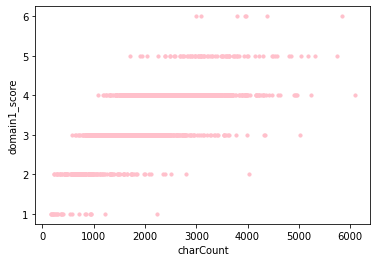

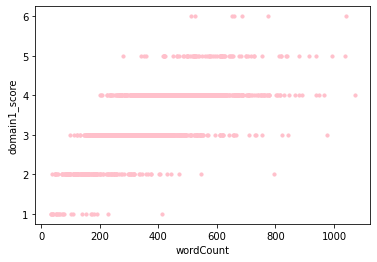

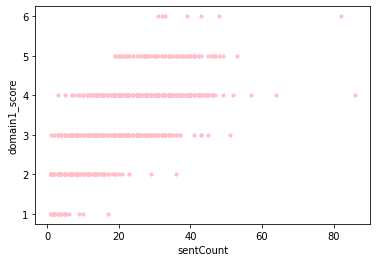

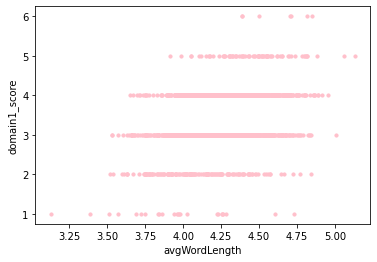

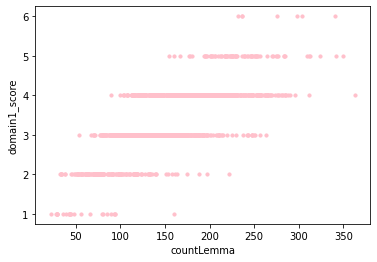

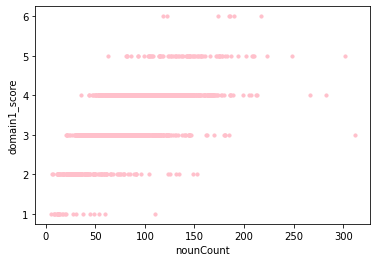

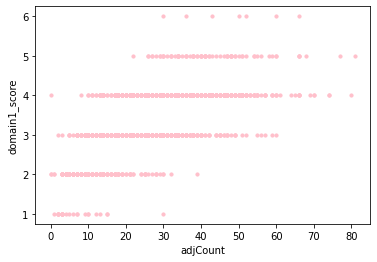

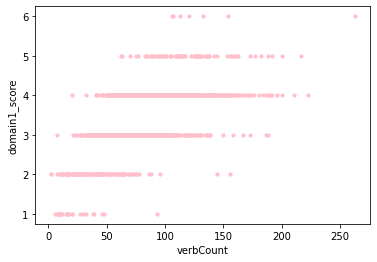

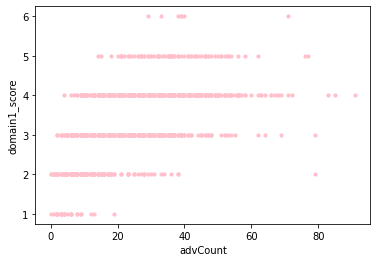

In [ ]:
#EXPLORATORY DATA ANALYSIS (EDA)

# Scatterplot diagrams: 

featuresSet2.plot.scatter(x = 'charCount', y = 'domain1_score', s = 10, c = 'pink')
featuresSet2.plot.scatter(x = 'wordCount', y = 'domain1_score', s = 10, c = 'pink')
featuresSet2.plot.scatter(x = 'sentCount', y = 'domain1_score', s = 10, c = 'pink')
featuresSet2.plot.scatter(x = 'avgWordLength', y = 'domain1_score', s = 10, c = 'pink')
featuresSet2.plot.scatter(x = 'countLemma', y = 'domain1_score', s = 10, c = 'pink')
featuresSet2.plot.scatter(x = 'nounCount', y = 'domain1_score', s = 10, c = 'pink')
featuresSet2.plot.scatter(x = 'adjCount', y = 'domain1_score', s = 10, c = 'pink')
featuresSet2.plot.scatter(x = 'verbCount', y = 'domain1_score', s = 10, c = 'pink')
featuresSet2.plot.scatter(x = 'advCount', y = 'domain1_score', s = 10, c = 'pink')

In [ ]:
# To split data for BOW + the rest of the features:

x = np.concatenate((featuresSet2.iloc[:, 3:].to_numpy(), xCV), axis = 1)
y = featuresSet2['domain1_score'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

NameError: ignored

In [ ]:
# Random Forest Regression model (BOW + other features):
rf_func = ensemble.RandomForestRegressor

rfRegressor = rf_func(n_estimators = 1000, random_state = 0)
rfRegressor.fit(x_train, y_train)

y_pred = rfRegressor.predict(x_test)

print("Cohen's kappa score: %.2f" % cohen_kappa_score(np.rint(y_pred), y_test))

Cohen's kappa score: 0.51


In [ ]:
# Support Vector Regression model (only 10 numerical/POS/orthographic features):

svr = SVR()
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 100], 'gamma':[0.1, 0.001]}

grid = GridSearchCV(svr, parameters)
grid.fit(x_train, y_train)

y_pred = grid.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

NameError: ignored

In [ ]:
# Linear Regression model (BOW + other features):

linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)

y_pred = linearRegressor.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

Cohen's kappa score: 0.30


In [ ]:
# Ridge Regression model (BOW + other features):

alphas = np.array([3, 1, 0.3, 0.1])

ridgeRegressor = Ridge()

grid = GridSearchCV(estimator = ridgeRegressor, param_grid = dict(alpha = alphas))
grid.fit(x_train, y_train)

y_pred = grid.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

Cohen's kappa score: 0.31


In [ ]:
# Lasso Regression model (BOW + other features):

alphas = np.array([3, 1, 0.3, 0.1])

lassoRegressor = Lasso()

grid = GridSearchCV(estimator = lassoRegressor, param_grid = dict(alpha = alphas))
grid.fit(x_train, y_train)

y_pred = grid.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.593e-02, tolerance: 6.073e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Cohen's kappa score: 0.41


In [ ]:
# To split data for only 10 numerical/POS/orthographic features:

x = featuresSet2.iloc[:, 3:].to_numpy()
y = featuresSet2['domain1_score'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
# Linear Regression model (only 10 numerical/POS/orthographic features):

linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)

y_pred = linearRegressor.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

Cohen's kappa score: 0.47


In [ ]:
# Ridge Regression model (only 10 numerical/POS/orthographic features):

alphas = np.array([3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001])

ridgeRegressor = Ridge()

grid = GridSearchCV(estimator = ridgeRegressor, param_grid = dict(alpha = alphas))
grid.fit(x_train, y_train)

y_pred = grid.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

Cohen's kappa score: 0.47


In [ ]:
# Lasso Regression model (only 10 numerical/POS/orthographic features):

alphas = np.array([3, 1, 0.3, 0.1, 0.3])

lassoRegressor = Lasso()

grid = GridSearchCV(estimator = lassoRegressor, param_grid = dict(alpha = alphas))
grid.fit(x_train, y_train)

y_pred = grid.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

Cohen's kappa score: 0.47


In [ ]:
# Support Vector Regression model (only 10 numerical/POS/orthographic features):

svr = SVR()
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 100], 'gamma':[0.1, 0.001]}

grid = GridSearchCV(svr, parameters)
grid.fit(x_train, y_train)

y_pred = grid.predict(x_test)

print('Cohen\'s kappa score: %.2f' % cohen_kappa_score(np.rint(y_pred), y_test))

Cohen's kappa score: 0.41


In [ ]:
# Random Forest Regression model (only 10 numerical/POS/orthographic features):
rf_func = ensemble.RandomForestRegressor

rfRegressor = rf_func(n_estimators = 1000, random_state = 0)
rfRegressor.fit(x_train, y_train)

y_pred = rfRegressor.predict(x_test)

print("Cohen's kappa score: %.2f" % cohen_kappa_score(np.rint(y_pred), y_test))

Cohen's kappa score: 0.49
